# 테이블마다 어떤 데이터가 있는지 살펴보기

### Pandas 라이브러리 불러오기

In [1]:
import pandas as pd

### 데이터 읽어오기

In [2]:
links = pd.read_csv('links.csv')
movies = pd.read_csv('movies.csv')
ratings = pd.read_csv('ratings.csv')
tags = pd.read_csv('tags.csv')

### 테이블마다 몇 개(row)의 데이터가 있는지 확인
테이블명.shape : (행 row, 열 column)의 개수 출력

In [3]:
print(links.shape)
print(movies.shape)
print(ratings.shape)
print(tags.shape)

(9742, 3)
(9742, 3)
(100836, 4)
(3683, 4)


### 테이블마다 어떤 컬럼이 있는지 확인
테이블명.columns : 컬럼명 출력

In [4]:
print(links.columns)
print(movies.columns)
print(ratings.columns)
print(tags.columns)

Index(['movieId', 'imdbId', 'tmdbId'], dtype='object')
Index(['movieId', 'title', 'genres'], dtype='object')
Index(['userId', 'movieId', 'rating', 'timestamp'], dtype='object')
Index(['userId', 'movieId', 'tag', 'timestamp'], dtype='object')


* links: movieId(무비렌즈 ID), imdbId, tmdbId
* movies: movieId, 제목, 장르
* ratings: userId, movieId, 유저가 남긴 평점, 평점을 남긴 시각
* tags: userId, movieId, 유저가 남긴 태그, 태그를 남긴 시각

# movies 테이블 전처리 & EDA

movies 테이블을 먼저 확인해 봅시다. 그냥 어떻게 생겼는지 일단 보려는 건데 9742행이나 되는 테이블 전체를 다 볼 필요가 없습니다.  
대신 테이블명.head() 명령어로 제일 위에 있는 5개의 행만 확인할 수 있습니다.

In [5]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


맨 끝에 있는 5줄을 확인할 때는 테이블명.tail() 을 쓸 수 있습니다.  
그리고 head와 tail 모두 () 안에 아무 숫자도 안 쓰면 5줄을 보여주지만, 다른 숫자를 쓰면 그 숫자만큼의 행을 보여줍니다. 예를 들어, tail(10) 이라고 쓰면 마지막 10개의 row를 출력합니다.

In [6]:
movies.tail(10)

,movieId,title,genres
9732,193565,Gintama: The Movie (2010),Action|Animation|Comedy|Sci-Fi
9733,193567,anohana: The Flower We Saw That Day - The Movi...,Animation|Drama
9734,193571,Silver Spoon (2014),Comedy|Drama
9735,193573,Love Live! The School Idol Movie (2015),Animation
9736,193579,Jon Stewart Has Left the Building (2015),Documentary
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
9739,193585,Flint (2017),Drama
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation
9741,193609,Andrew Dice Clay: Dice Rules (1991),Comedy


title 컬럼에 제목 뿐만 아니라 개봉년도도 함께 들어가 있습니다. 이걸 나눠서 제목은 title에 그대로 두고, 개봉년도는 year라는 새 컬럼에 넣어 봅시다.

## title, year 컬럼

### 특정 컬럼 값 가져오기 & 새 컬럼 만들기

우선 정제할 title 컬럼의 값만 뽑아서 보겠습니다.  
테이블에서 특정 컬럼의 값만 가져올 때는 테이블명['컬럼명'] 으로 표시합니다. 만약 2개 이상의 컬럼을 가져오려면 괄호를 두 번 써 줘야 합니다.

In [7]:
movies['title']

0                                        Toy Story (1995)
1                                          Jumanji (1995)
2                                 Grumpier Old Men (1995)
3                                Waiting to Exhale (1995)
4                      Father of the Bride Part II (1995)
5                                             Heat (1995)
6                                          Sabrina (1995)
7                                     Tom and Huck (1995)
8                                     Sudden Death (1995)
9                                        GoldenEye (1995)
10                         American President, The (1995)
11                     Dracula: Dead and Loving It (1995)
12                                           Balto (1995)
13                                           Nixon (1995)
14                                Cutthroat Island (1995)
15                                          Casino (1995)
16                           Sense and Sensibility (1995)
17            

In [8]:
movies[['title', 'genres']]

,title,genres
0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,Jumanji (1995),Adventure|Children|Fantasy
2,Grumpier Old Men (1995),Comedy|Romance
3,Waiting to Exhale (1995),Comedy|Drama|Romance
4,Father of the Bride Part II (1995),Comedy
5,Heat (1995),Action|Crime|Thriller
6,Sabrina (1995),Comedy|Romance
7,Tom and Huck (1995),Adventure|Children
8,Sudden Death (1995),Action
9,GoldenEye (1995),Action|Adventure|Thriller


새로운 컬럼을 만들어 테이블에 추가할 때도 테이블명['컬럼명'] 을 쓸 수 있습니다. '컬럼명'에 새로 만들 컬럼의 이름을 써 주는 거죠. 그런데 이 때 새로 만들 이 컬럼에 들어 갈 데이터도 같이 만들어줘야 합니다.  
우리는 'year' 컬럼을 만들어 개봉년도를 넣을 건데, 개봉년도는 title에서 떼어 오는 작업이 추가로 필요하니까 일단은 전부 0으로 채워놔 봅시다. 

In [9]:
movies['year'] = 0

year 컬럼이 추가된 것을 확인할 수 있습니다.

In [10]:
movies.head()

,movieId,title,genres,year
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,0
1,2,Jumanji (1995),Adventure|Children|Fantasy,0
2,3,Grumpier Old Men (1995),Comedy|Romance,0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,0
4,5,Father of the Bride Part II (1995),Comedy,0


### 패턴에 일치하는 문자열만 가져오기

title에서 개봉년도는 제목과 공백 한 칸 뒤에 위치하고, 소괄호와 숫자 4개로 이루어져 있습니다. (1995) 처럼요. 그래서 '여는 소괄호 + 숫자 4개 + 닫는 소괄호'라는 패턴을 지정해주고 이 패턴에 일치하는 문자열을 뽑아오라는 명령어를 쓰도록 하겠습니다. 여기서 괄호를 꼭 넣는 이유는 영화 제목에도 연도가 포함되는 경우가 있기 때문입니다. 우리나라 영화에도 '1987'이란 영화가 있죠. 이런 경우에 영화 제목을 개봉년도로 인식하고 뽑아올 수 있기 때문에 패턴에 괄호를 포함시켜야 합니다.  

패턴은 정규식으로 만들 수 있습니다. 일단 () 안에 들어가야 패턴으로 지정이 되기 때문에, 괄호를 가장 바깥쪽에 쓰고요. 우리가 찾으려고 하는 문자열 괄호 '('와 ')' 앞에는 이스케이프 문자(\)를 붙여줘서 이게 정규식에서의 기능이 아니라 진짜 괄호 문자를 의미한다는 것을 알려 줍니다. 숫자는 정규식에서 \d 로 표현하는데, 연도는 4개의 숫자로 되어 있으므로 4번을 써줘야 겠죠. 즉, 이걸 (1995) 와 같은 형태로 순서대로 배치하면 \(\d\d\d\d\) 입니다.   

판다스에서 문자열을 추출하는 명령어는 컬럼명.str.extract('패턴') 입니다. str은 string을 의미하는데, 컬럼을 하나 뽑아왔을 경우 문자열이 아니라 시리즈 형태로 가져오기 때문에 문자열을 다루는 extract 같은 함수 앞에는 str을 붙여줘야 합니다.   

In [11]:
movies['title'].str.extract('(\(\d\d\d\d\))')

,0
0,(1995)
1,(1995)
2,(1995)
3,(1995)
4,(1995)
5,(1995)
6,(1995)
7,(1995)
8,(1995)
9,(1995)


이 값을 아까 만든 year 컬럼에 저장해 봅시다. 아까는 데이터를 다 0으로 채웠었는데, 그걸 연도로 대체하는 것입니다.

In [12]:
movies['year'] = movies['title'].str.extract('(\(\d\d\d\d\))')

In [13]:
movies['year'].head()

0    (1995)
1    (1995)
2    (1995)
3    (1995)
4    (1995)
Name: year, dtype: object

영화 제목에 연도가 들어가는 경우 때문에 괄호까지 같이 가져왔지만 year 컬럼에서는 쓸모가 없으니 떼어냅시다. 위에서 쓴 패턴에서 앞뒤 괄호만 제외하면 숫자 4개만으로 이루어진 새로운 패턴이 됩니다.

In [14]:
movies['year'] = movies['year'].str.extract('(\d\d\d\d)')

In [15]:
movies.head()

,movieId,title,genres,year
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995
1,2,Jumanji (1995),Adventure|Children|Fantasy,1995
2,3,Grumpier Old Men (1995),Comedy|Romance,1995
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995
4,5,Father of the Bride Part II (1995),Comedy,1995


### 결측치 확인

컬럼명.unique() 를 사용하면 그 컬럼에 어떤 데이터들이 들어있는지 종류를 모두 볼 수 있습니다.

In [16]:
movies['year'].unique()

array(['1995', '1994', '1996', '1976', '1992', '1967', '1993', '1964',
       '1977', '1965', '1982', '1990', '1991', '1989', '1937', '1940',
       '1969', '1981', '1973', '1970', '1955', '1959', '1968', '1988',
       '1997', '1972', '1943', '1952', '1951', '1957', '1961', '1958',
       '1954', '1934', '1944', '1960', '1963', '1942', '1941', '1953',
       '1939', '1950', '1946', '1945', '1938', '1947', '1935', '1936',
       '1956', '1949', '1932', '1975', '1974', '1971', '1979', '1987',
       '1986', '1980', '1978', '1985', '1966', '1962', '1983', '1984',
       '1948', '1933', '1931', '1922', '1998', '1929', '1930', '1927',
       '1928', '1999', '2000', '1926', '1919', '1921', '1925', '1923',
       '2001', '2002', '2003', '1920', '1915', '1924', '2004', '1916',
       '1917', '2005', '2006', '1902', nan, '1903', '2007', '2008',
       '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016',
       '2017', '2018', '1908'], dtype=object)

<추가할 것: 결측치에 대한 스토리>
* 결측치가 데이터 사이언스에 어떤 의미인지, 왜 특별하게 처리해줘야 하는지
* 어떻게 다룰 수 있는지
참고: https://dev.acquia.com/blog/how-to-handle-missing-data-in-machine-learning-5-techniques/09/07/2018/19651

'nan'은 이 값에 해당하는 데이터가 없다는 뜻으로, 결측값(missing value) 또는 결측치라고 부릅니다. title에 개봉년도 없이 제목만 써 있는 데이터가 있었기 때문에 이런 값이 나온 것입니다. 어떤 영화들이 이에 해당하는지 확인해 볼까요.  
컬럼 값이 결측값인 데이터만 찾을 때는 컬럼명.isnull() 이라는 명령어를 사용합니다. 그리고 이걸 어떤 테이블 안에서 찾는지, 그 테이블 이름으로 괄호로 감싸줘야 해서 테이블명[컬럼명.isnull()] 이라고 씁니다.

In [17]:
movies[movies['year'].isnull()]

,movieId,title,genres,year
6059,40697,Babylon 5,Sci-Fi,NaN
9031,140956,Ready Player One,Action|Sci-Fi|Thriller,NaN
9091,143410,Hyena Road,(no genres listed),NaN
9138,147250,The Adventures of Sherlock Holmes and Doctor W...,(no genres listed),NaN
9179,149334,Nocturnal Animals,Drama|Thriller,NaN
9259,156605,Paterson,(no genres listed),NaN
9367,162414,Moonlight,Drama,NaN
9448,167570,The OA,(no genres listed),NaN
9514,171495,Cosmos,(no genres listed),NaN
9515,171631,Maria Bamford: Old Baby,(no genres listed),NaN


역시 title에 개봉년도가 써 있지 않는 데이터들이었습니다. The OA 나 블랙미러는 영화는 아니고 넷플릭스에서 볼 수 있는 시리즈물인데 이 테이블에 포함되어 있네요. 몇 해에 걸쳐 여러 시즌이 나오다 보니 연도 표시가 안 됐나봐요. 데스노트도 마찬가진데 이건 연도가 (2006-2007) 로 써 있다보니 저희가 찾은 패턴에 걸리지 않았어요. 패터슨, 문라이트는 영화가 맞는데 왜 없는지 모르겠네요.  

이 컬럼에 결측치가 몇 개인지를 확인하기 위해서 컬럼명.isnull().sum() 을 사용합니다. 만약 0이 나온다면 그 컬럼에는 결측치가 하나도 없는 거겠죠. 컬럼명 대신 테이블명을 사용해서 모든 컬럼의 결측치 개수를 확인할 수도 있습니다.

In [18]:
movies['year'].isnull().sum()

13

In [19]:
movies.isnull().sum()

movieId     0
title       0
genres      0
year       13
dtype: int64

### countplot 그리기 : 가장 많은 영화가 개봉한 해는?

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

어느 해에 개봉한 영화의 데이터가 가장 많이 들어있는지 찾아볼까요? seaborn 라이브러리를 사용해 각 연도마다 몇 개의 데이터가 있는지 카운트해서 막대로 나타내는 countplot 차트를 그려보겠습니다.  
sns.countplot 코드의 괄호 안에 movies 테이블에서 데이터를 가져올 거고, x축에 year 컬럼의 데이터를 배치하겠다는 것을 표기해 줍니다. sns.countplot(data=테이블명, x='컬럼명')

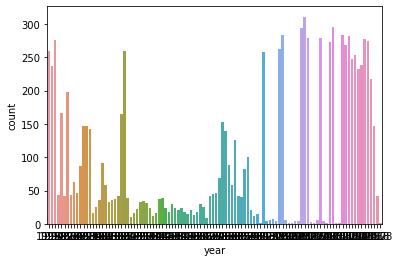

In [21]:
sns.countplot(data=movies, x='year')

그래프가 너무 작아서 연도가 다 겹쳐져 보이네요. 이럴 때는 차트가 들어갈 캔버스의 사이즈를 미리 크게 잡아두는 코드 plt.figure(figsize=(가로길이, 세로길이))를 먼저 입력할 수 있습니다. 그러고 나서 차트를 그리면 미리 지정해 둔 사이즈에 맞게 크게 그려집니다.

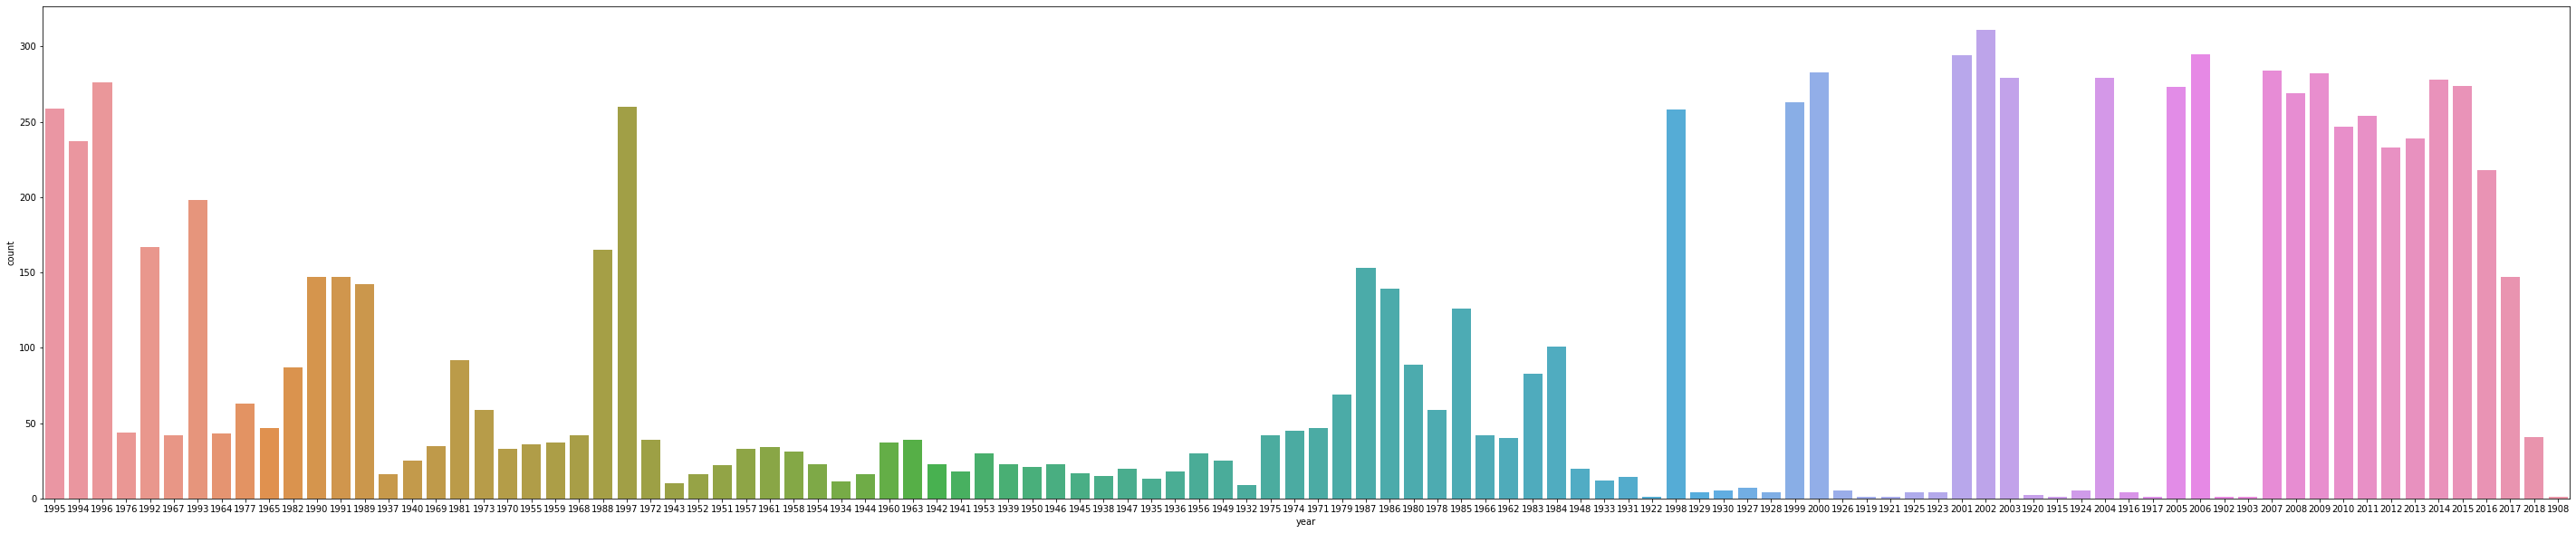

In [22]:
plt.figure(figsize=(50, 10))
sns.countplot(data=movies, x='year')

sns.countplot 에서 x 대신 y에 데이터를 넣어서 가로막대 형태로 그릴 수도 있습니다.

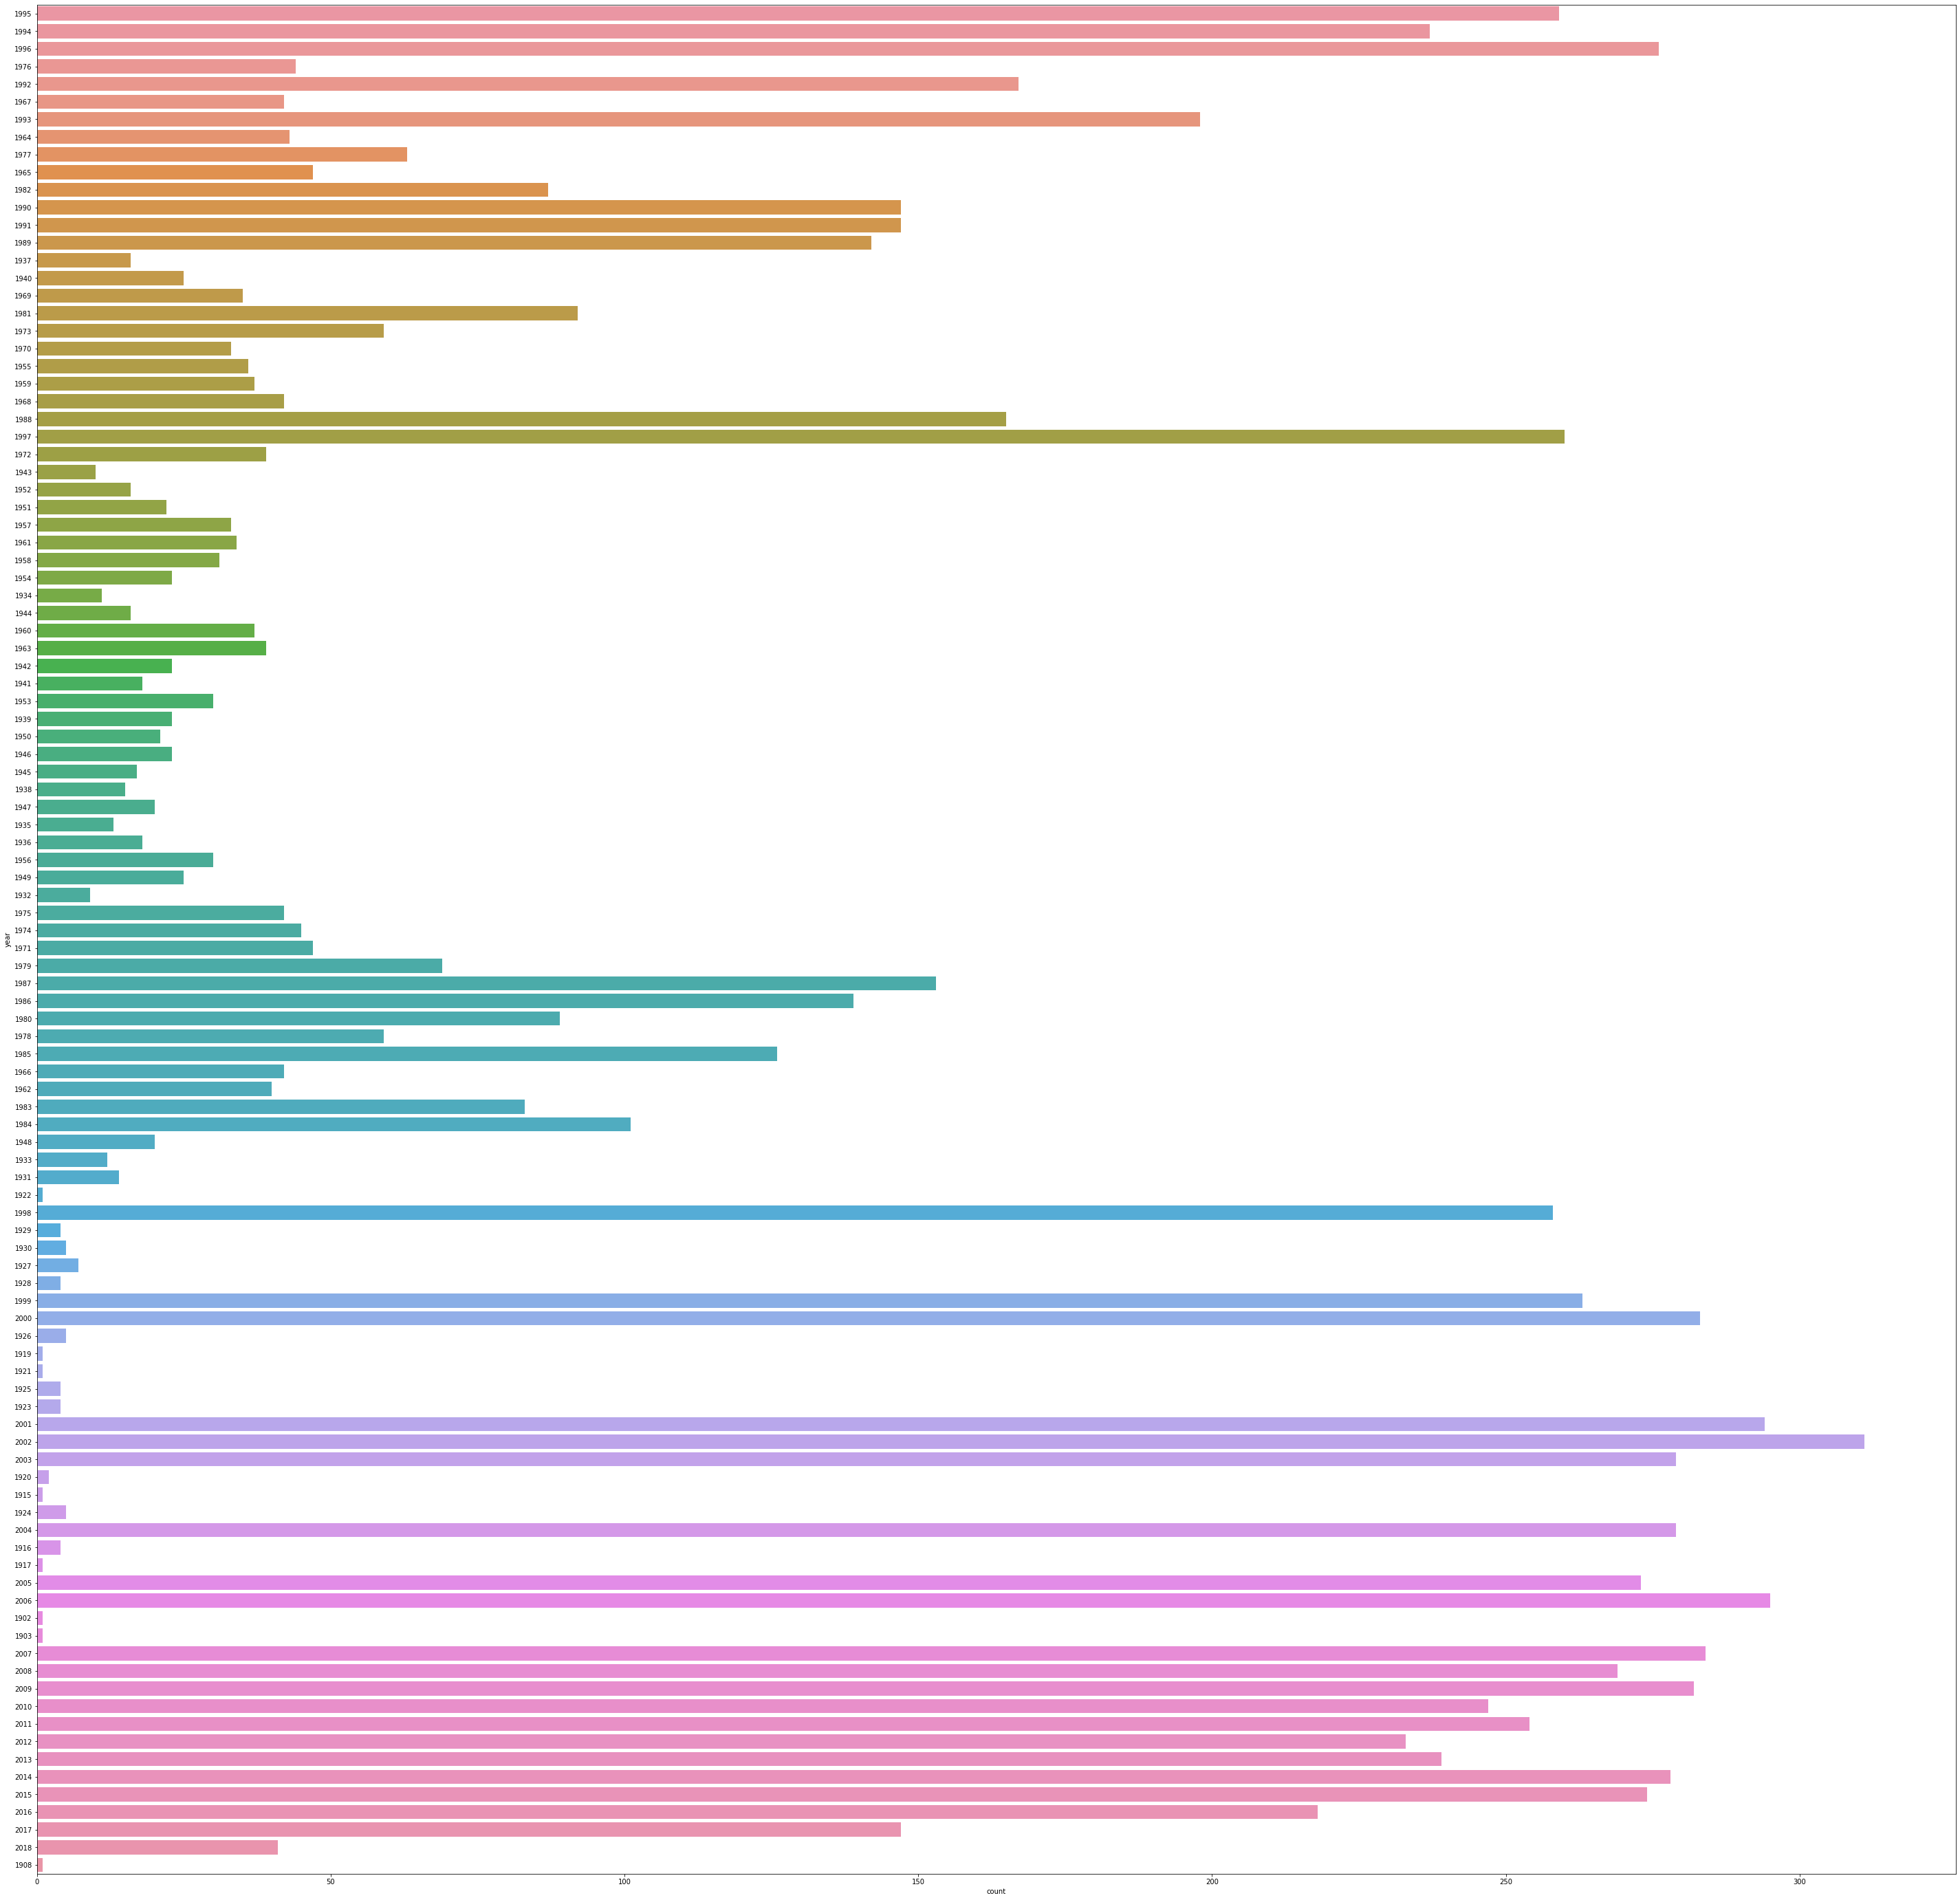

In [23]:
plt.figure(figsize=(50, 50))
sns.countplot(data=movies, y='year')

그런데 막대가 들쭉날쭉해서 어느 해의 영화가 가장 많은지, 가장 적은지 한 눈에 알기가 어렵습니다. 많은 순서대로 세워놓으면 더 보기 좋지 않을까요? order 기능을 이용해서 배열 순서를 정해줄 수 있는데 우리는 영화 수를 카운트한 숫자를 그 기준으로 삼을 거에요.  
먼저 판다스의 value_counts()로 각 데이터 값이 몇 개씩 있는 지를 알아 봅시다.

In [24]:
movies['year'].value_counts()

2002    311
2006    295
2001    294
2007    284
2000    283
2009    282
2003    279
2004    279
2014    278
1996    276
2015    274
2005    273
2008    269
1999    263
1997    260
1995    259
1998    258
2011    254
2010    247
2013    239
1994    237
2012    233
2016    218
1993    198
1992    167
1988    165
1987    153
1991    147
1990    147
2017    147
       ... 
1941     18
1945     17
1952     16
1937     16
1944     16
1938     15
1931     14
1935     13
1933     12
1934     11
1943     10
1932      9
1927      7
1924      5
1926      5
1930      5
1923      4
1928      4
1929      4
1925      4
1916      4
1920      2
1915      1
1902      1
1919      1
1917      1
1908      1
1903      1
1921      1
1922      1
Name: year, Length: 106, dtype: int64

차트의 x축에는 이 상태로 정렬된 연도가 왼쪽부터 들어가야 합니다. 그런데 연도만 필요하지 영화 개수는 필요 없으므로 여기서 인덱스만을 뽑아오기 위해 뒤에 .index를 붙여줍니다.

In [25]:
movies['year'].value_counts().index

Index(['2002', '2006', '2001', '2007', '2000', '2009', '2003', '2004', '2014',
       '1996',
       ...
       '1916', '1920', '1915', '1902', '1919', '1917', '1908', '1903', '1921',
       '1922'],
      dtype='object', length=106)

이제 이걸 sns.countplot의 괄호 안에 order= 의 값으로 지정해 줍니다.

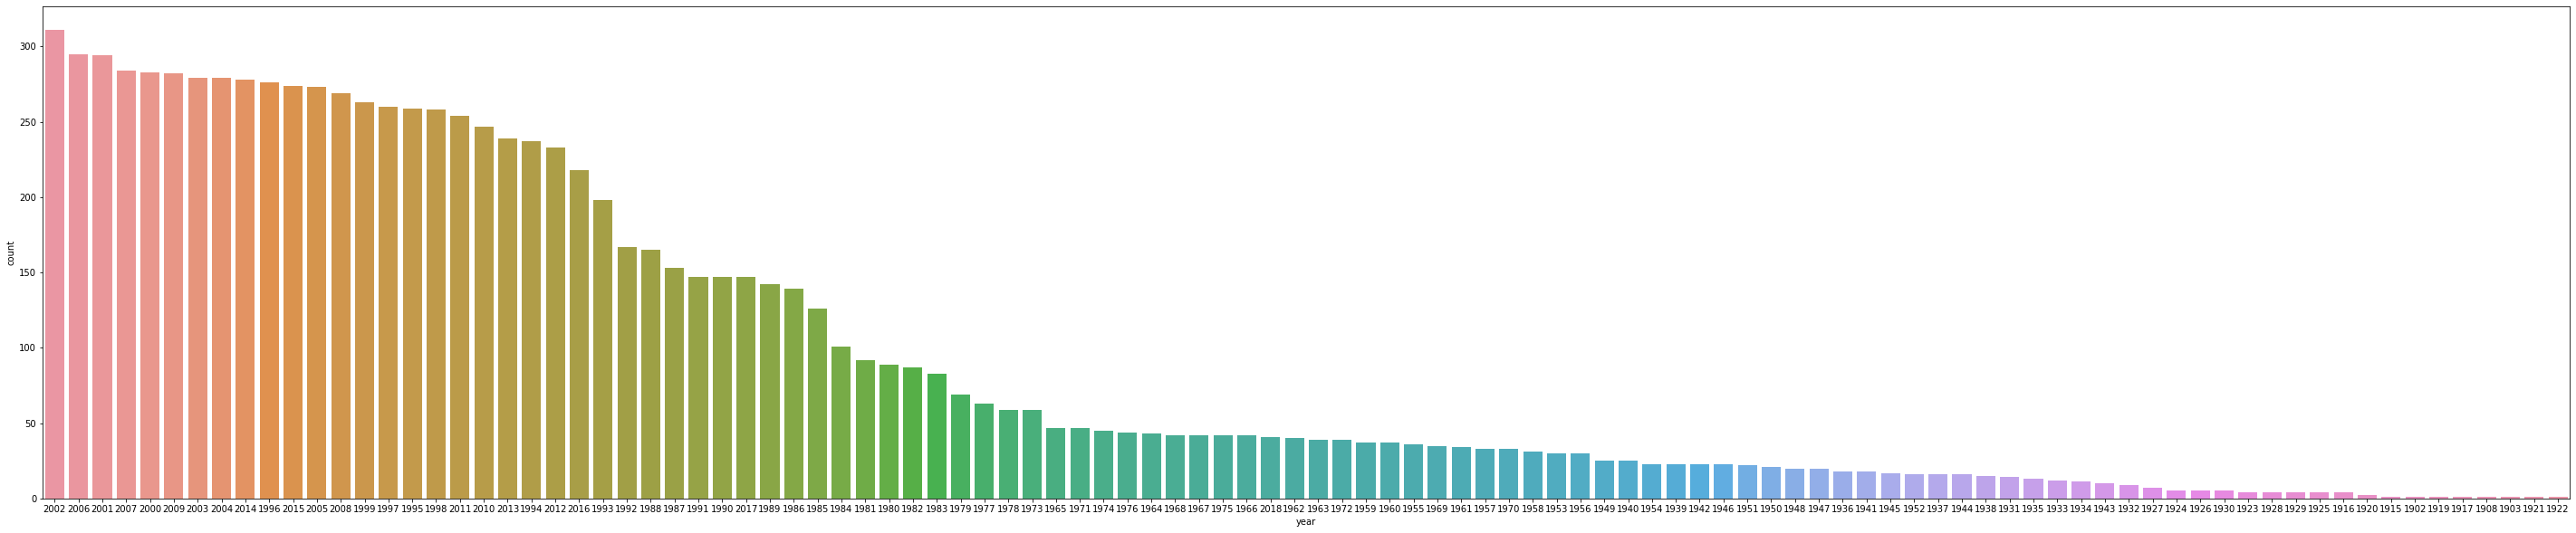

In [26]:
plt.figure(figsize=(50, 10))
sns.countplot(data=movies, x='year', order=movies['year'].value_counts().index)

우리가 가진 이 데이터에는 2002년 개봉작이 제일 많네요! 전체적으로 2000년대와 1990년대 후반 영화가 많고 1908년.. 막 이런 고전영화는 아주 적은 데이터만 들어 있는 걸 알 수 있습니다. 아무래도 고전영화를 추천하게 될 가능성은 적을 것 같아요.

## genres 컬럼

장르를 살펴보겠습니다. 영화가 오직 한 가지 장르만 따르는 경우는 거의 없습니다. SF 영화이면서 코미디일 수도 있죠. 그래서 우리 데이터에도 대부분 한 영화당 여러 개의 장르가 적혀있고 장르 이름들 사이에 | 이 표기되어 서로 구분되어 있습니다.

In [27]:
movies.head()

,movieId,title,genres,year
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995
1,2,Jumanji (1995),Adventure|Children|Fantasy,1995
2,3,Grumpier Old Men (1995),Comedy|Romance,1995
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995
4,5,Father of the Bride Part II (1995),Comedy,1995


### 더미코딩 (Dummy Coding)

이 데이터의 장르는 19개의 카테고리로 나누어져 있는데요. 토이 스토리는 이 19개 중 어드벤쳐, 애니메이션, 어린이, 코미디, 판타지, 총 5개의 카테고리에 해당합니다. 데이터 분석을 할 때 이런 카테고리형 텍스트 데이터들을 숫자 형태로 변환해 놓으면 분석하기가 용이합니다. 더미코딩은 이렇게 숫자 데이터로 변환하는 방법 중의 하나이고, 0과 1을 이용합니다. (원핫인코딩은 카테고리 딱 하나에만 1이 들어가야 하므로 이 땐 원핫인코딩 아니고 더미코딩?)  
그 카테고리에 해당하면 1, 해당하지 않으면 0을 부여하는 방식입니다. 토이 스토리의 경우, 어드벤쳐 카테고리의 값은 1죠. 애니메이션 카테고리에서도 1이고요. 하지만 로맨스 카테고리에서는 0입니다. 토이 스토리의 genres 컬럼에 로맨스가 포함되지 않기 때문에요.  

판다스는 더미코딩을 쉽게 하는 명령어를 제공하고 있습니다. 컬럼명.str.get_dummies(sep='구분자') 입니다.  
이전 강의에서 말했듯이 컬럼 하나는 시리즈 형태로 뽑혀져 나오고, 이 시리즈에 속한 '문자열'을 다룰 것이기 때문에 앞에 .str 이 붙습니다. 괄호 안 sep= 는 여기에 써 주는 구분자로 문자열을 나눠서 각각의 문자열로 컬럼 하나씩을 만들겠다는 뜻입니다. 이 데이터의 경우 컬럼 안에서 장르끼리를 구분하고 있는 '|'가 됩니다.

In [28]:
genres_dummies = movies['genres'].str.get_dummies(sep='|')
genres_dummies

,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,0,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
6,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
7,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


이렇게 만든 더미코딩 테이블을 genres_dummies라는 이름으로 저장했는데요. 여기에는 각각의 행이 어떤 영화에 대한 정보인지를 알려주는 컬럼이 없으므로, movies에서 movieId를 가져와 이 테이블의 인덱스로 지정해 주겠습니다.  
테이블명.set_index(인덱스로만들컬럼명)

In [29]:
genres_dummies = genres_dummies.set_index(movies['movieId'])
genres_dummies.head()

,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
movieId,,,,,,,,,,,,,,,,,,,,
1,0,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0
5,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [30]:
# genres_dummies.to_csv('genres_d.csv')

### 장르 간 상관관계 확인 & heatmap 그리기 : 가장 흔한 장르 조합은?  

숫자로 바꿨으니 .corr() 로 두 컬럼 간의 상관계수를 확인할 수 있습니다. 1에 가까운 양수일수록 한 영화 안에서 두 장르가 같이 등장하는 경우가 많다는 뜻입니다.

In [31]:
genres_dummies.corr()

,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
(no genres listed),1.000000,-0.028442,-0.022840,-0.015309,-0.016005,-0.046878,-0.022171,-0.012871,-0.053277,-0.017447,-0.005618,-0.019769,-0.007599,-0.011151,-0.014794,-0.026195,-0.019792,-0.029073,-0.011956,-0.007816
Action,-0.028442,1.000000,0.291949,0.029659,-0.049652,-0.148968,0.154471,-0.099463,-0.152964,0.059931,-0.031649,-0.035443,0.131864,-0.083331,-0.028515,-0.146670,0.233475,0.199042,0.076289,0.021600
Adventure,-0.022840,0.291949,1.000000,0.211472,0.273931,-0.055215,-0.085988,-0.075111,-0.156327,0.262511,-0.030140,-0.098423,0.143982,-0.005544,-0.048427,-0.072584,0.181797,-0.035942,0.010195,0.036136
Animation,-0.015309,0.029659,0.211472,1.000000,0.437376,0.029079,-0.069847,-0.050144,-0.160504,0.196895,-0.015555,-0.062464,0.080744,0.111804,-0.030477,-0.061882,0.064093,-0.107822,-0.036990,-0.024378
Children,-0.016005,-0.049652,0.273931,0.437376,1.000000,0.088701,-0.086442,-0.056859,-0.160742,0.234117,-0.025673,-0.083569,0.062011,0.137072,-0.036449,-0.070189,-0.011910,-0.127716,-0.048341,-0.016890
Comedy,-0.046878,-0.148968,-0.055215,0.029079,0.088701,1.000000,-0.075282,-0.131657,-0.283472,-0.005708,-0.070710,-0.133382,-0.056627,0.045466,-0.127209,0.153088,-0.132400,-0.286289,-0.095919,-0.039622
Crime,-0.022171,0.154471,-0.085988,-0.069847,-0.086442,-0.075282,1.000000,-0.073955,0.063005,-0.086254,0.137141,-0.063805,-0.020892,-0.056850,0.124138,-0.097444,-0.095166,0.265196,-0.059585,-0.022997
Documentary,-0.012871,-0.099463,-0.075111,-0.050144,-0.056859,-0.131657,-0.073955,1.000000,-0.173925,-0.060473,-0.020645,-0.069364,0.003381,-0.005664,-0.050168,-0.093597,-0.072736,-0.104346,-0.013378,-0.024915
Drama,-0.053277,-0.152964,-0.156327,-0.160504,-0.160742,-0.283472,0.063005,-0.173925,1.000000,-0.106337,0.024256,-0.187391,-0.063293,-0.038022,0.027635,0.122454,-0.158325,-0.008267,0.135067,-0.025060
Fantasy,-0.017447,0.059931,0.262511,0.196895,0.234117,-0.005708,-0.086254,-0.060473,-0.106337,1.000000,-0.023962,0.012336,0.102962,0.050524,0.014768,-0.000635,0.046094,-0.057807,-0.043959,-0.021441


좀 더 직관적으로 볼 수 있도록 시각화를 해봅시다. seaborn의 heatmap으로 히트맵을 그리면 색깔의 차이로 상관계수의 크고 작음을 한 눈에 판단할 수 있습니다. 

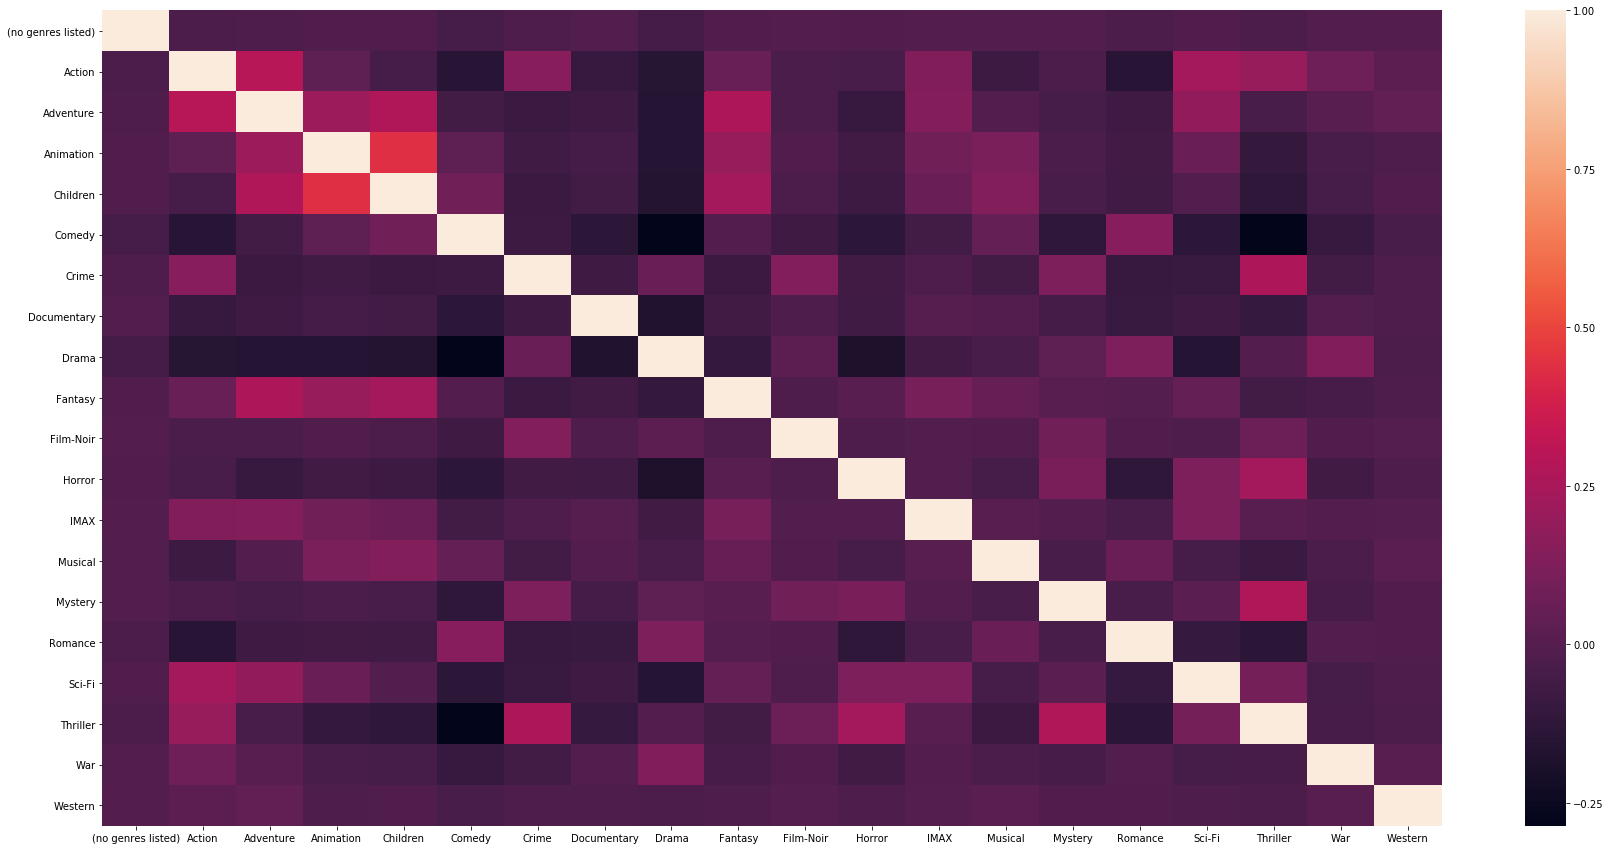

In [32]:
plt.figure(figsize=(30, 15))
sns.heatmap(genres_dummies.corr())

밝을 수록 양의 상관관계가 강하다는 뜻인데 (Children, Animation)의 빨간 색이 눈에 띄네요. 애니메이션은 대부분 어린이 관객을 위한 영화니까요. 그리고 음의 상관관계가 강한 검은색은 (Comedy, Thriller) 입니다.

# Ratings 테이블 전처리 & EDA

In [33]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [34]:
ratings.isnull().sum()

userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

### 테이블 합치기 (merge)

ratings 테이블에는 movieId만 있고 영화 제목 컬럼이 없어서 어떤 영화인지 알 수가 없으므로, 오른쪽에 movies 테이블을 붙여서 하나의 테이블로 만들어 주겠습니다. 판다스의 merge 함수를 사용합니다.  
왼쪽테이블명.merge(오른쪽테이블명, on=중복컬럼명)  
두 테이블을 붙이려면 양쪽에 동일하게 들어가 있는 중복 컬럼이 있어야 가능합니다. 여기서는 movieId 입니다. 

In [35]:
ratings = ratings.merge(movies, on='movieId')
ratings.head()

,userId,movieId,rating,timestamp,title,genres,year
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995
1,5,1,4.0,847434962,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995
2,7,1,4.5,1106635946,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995
3,15,1,2.5,1510577970,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995
4,17,1,4.5,1305696483,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995


In [36]:
ratings.shape

(100836, 7)

In [37]:
# ratings.to_csv('ratings_p.csv', index=False)

### 평점 분포 확인

평점의 범위는 0.5~5점이고, 0.5점 간격으로 총 10개의 평점이 있습니다.

In [38]:
ratings['rating'].unique()

array([4. , 4.5, 2.5, 3.5, 3. , 5. , 0.5, 2. , 1.5, 1. ])

사람들이 가장 많이 준 점수는 몇 점인지 히스토그램으로 확인해 봅시다. 컬럼명.hist() 함수를 사용합니다.

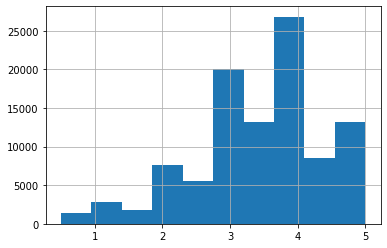

In [39]:
ratings['rating'].hist()

### 유저별 평점 기초통계량 확인

컬럼명.unique() 는 컬럼 안에 어떤 데이터들이 들어있는지 그 종류를 모두 보여줬습니다. 이 앞에 number의 n을 붙인 nunique() 는 그 종류를 전부 보여주지 않고, 종류의 개수만을 출력합니다. 이걸 이용해 평점을 준 유저가 몇 명인지를 알 수 있습니다.

In [40]:
ratings['userId'].nunique()

610

610명 중에 가장 많은 영화에 평점을 준 유저는 누구일까요? 이걸 알기 위해선 데이터를 userId를 기준으로 그룹지어서, 그 안에 데이터가 몇 개씩 있는지를 세 봐야 합니다. 이 때 사용하는 것이 판다스의 groupby 입니다.  
테이블명.groupby('그룹짓는기준')['연산할컬럼명'].연산내용  
우리는 userId로 그룹을 지을 거고, 평점(rating)이 몇 개씩인지 카운트하는 연산을 할 거에요.

In [41]:
ratings.groupby('userId')['rating'].count()

userId
1       232
2        29
3        39
4       216
5        44
6       314
7       152
8        47
9        46
10      140
11       64
12       32
13       31
14       48
15      135
16       98
17      105
18      502
19      703
20      242
21      443
22      119
23      121
24      110
25       26
26       21
27      135
28      570
29       81
30       34
       ... 
581      40
582      56
583      56
584      83
585      61
586     208
587     165
588      56
589      40
590     728
591      54
592      94
593     103
594     232
595      20
596     411
597     443
598      21
599    2478
600     763
601     101
602     135
603     943
604     100
605     221
606    1115
607     187
608     831
609      37
610    1302
Name: rating, Length: 610, dtype: int64

평점 개수가 가장 많은 유저를 쉽게 찾기 위해 이걸 큰 숫자부터 정렬해 봅시다. sort_values 를 사용하면 되는데 이 함수는 디폴트 값이 오름차순(ascending) 이라서 작은 수부터 정렬됩니다. 우리는 반대로 할 것이므로 ascending=False 라는 옵션을 넣어줍니다.

In [42]:
ratings.groupby('userId')['rating'].count().sort_values(ascending=False)

userId
414    2698
599    2478
474    2108
448    1864
274    1346
610    1302
68     1260
380    1218
606    1115
288    1055
249    1046
387    1027
182     977
307     975
603     943
298     939
177     904
318     879
232     862
480     836
608     831
600     763
483     728
590     728
105     722
19      703
305     677
489     648
111     646
438     635
       ... 
531      22
157      21
324      21
364      21
598      21
245      21
549      21
293      21
439      21
49       21
37       21
507      21
281      21
547      21
87       21
26       21
257      20
189      20
595      20
53       20
320      20
278      20
207      20
431      20
576      20
569      20
194      20
147      20
406      20
442      20
Name: rating, Length: 610, dtype: int64

414번 유저가 무려 2698개의 영화에 평점을 남겼네요! 이번엔 점수를 후하게 주는 유저는 누군지, 짜게 주는 유저는 누군지 찾아 봅시다.  
groupby를 하고 평균을 구하는 mean(), 최대값을 구하는 max() 연산을 사용해 직접 찾아 보세요.

##### Q. 유저별 평균 평점을 구하고, 평균평점이 가장 높은 유저를 찾으세요.

In [43]:
ratings.groupby('userId')['rating'].mean().sort_values(ascending=False)

userId
53     5.000000
251    4.869565
515    4.846154
25     4.807692
30     4.735294
523    4.693333
348    4.672727
171    4.634146
452    4.556931
43     4.552632
371    4.548780
122    4.546233
441    4.522222
400    4.511628
52     4.476923
538    4.472973
168    4.462766
417    4.462687
543    4.453947
106    4.439394
319    4.428571
601    4.425743
413    4.410714
475    4.409677
188    4.395833
12     4.390625
276    4.390244
154    4.382353
533    4.381579
581    4.375000
         ...   
365    2.750903
386    2.750000
431    2.725000
149    2.724138
245    2.714286
160    2.708238
535    2.666667
307    2.665641
599    2.642050
428    2.640000
333    2.640000
36     2.633333
287    2.621711
293    2.619048
294    2.610984
19     2.607397
297    2.597222
22     2.571429
571    2.571429
255    2.568182
3      2.435897
308    2.426087
517    2.386250
298    2.363685
311    2.339286
567    2.245455
153    2.217877
508    2.145833
139    2.144330
442    1.275000
Name: rating, Len

##### Q. 각 유저가 준 가장 높은 평점이 몇 점이었는지 구해 보세요.

In [44]:
ratings.groupby('userId')['rating'].max().sort_values()

userId
442    2.5
293    4.0
320    4.0
54     4.0
163    4.0
139    4.0
245    4.0
404    4.0
214    4.0
609    4.0
133    4.0
26     4.0
132    4.5
194    4.5
36     4.5
281    4.5
354    4.5
570    4.5
525    4.5
131    4.5
49     4.5
50     4.5
271    4.5
490    4.5
560    4.5
257    4.5
478    4.5
123    4.5
311    4.5
508    4.5
      ... 
225    5.0
219    5.0
226    5.0
229    5.0
230    5.0
231    5.0
232    5.0
233    5.0
234    5.0
227    5.0
218    5.0
217    5.0
216    5.0
200    5.0
201    5.0
202    5.0
203    5.0
204    5.0
205    5.0
206    5.0
207    5.0
208    5.0
209    5.0
210    5.0
211    5.0
212    5.0
213    5.0
215    5.0
198    5.0
610    5.0
Name: rating, Length: 610, dtype: float64

### 영화별

### 장르별